<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h3>Modul 11: Asesmen Praktikum Tengah Semseter</h3>
</div>

**Jangan lupa untuk selalup *import library* yang digunakan ketika memulai sesi baru (*run time*) atau kode Python yang memerlukan *library***.

In [1]:
# Import library yang digunakan
import matplotlib.pyplot as plt
# Library untuk membuat graf
import networkx as nx

In [2]:
print("Ananda Bintang Saputra")  # Tuliskan nama lengkap Anda
print("1203230040")  # Tuliskan NIM Anda
print("IF-03-02")  # Tuliskan kelas Anda
print("") # Tuliskan kode asprak anda

Ananda Bintang Saputra
1203230040
IF-03-02



### 1. Penjelajahan Kota untuk Rute Transportasi dan Pariwisata

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [3]:
# Data posisi untuk masing-masing node agar lebih rapi saat ditampilkan
pos = {
    "A": (0, 4),
    "B": (-3, 2),
    "C": (3, 2),
    "D": (-4, 0),
    "E": (0, 0),
    "F": (4, -1),
    "G": (0, -3)
}


In [6]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
    # Membuat pos jika pos tidak diberikan
    if pos is None:
        pos = nx.spring_layout(G)

    # Fungsi untuk menggambar node
    nx.draw(
        G,                  # Graf NetworkX
        pos,                # Posisi node
        with_labels=True,   # Menampilkan nama node 
        node_color='red',   # Warna node
        node_size=2000,     # Ukuran node
        font_color="white", # Warna font label node
        font_weight="bold", # Ketebalan font label node
        width=5             # Ketebalan garis edge
    )

    # Mengambil label edge jika ada weight
    edge_labels = nx.get_edge_attributes(G, 'weight')  
    # Fungsi untuk menggambar node
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels, # Data weight
        font_color='blue',       # Warna font label edge
        font_weight="bold",      # Berat font label edge
        font_size=16,            # Ukuran font label edge
    )

    plt.margins(0.2)  # Memberikan margin pada plot
    plt.title(title)  # Menampilkan judul graf jika diberikan
    plt.show()        # Menampilkan graf menggunakan matplotlib


Dina adalah seorang manajer transportasi di sebuah kota wisata besar. Kota ini terdiri dari beberapa wisata terkenal, yang dihubungkan oleh jalan-jalan yang dirancang untuk memudahkan para tulis mengunjungi tempat-tempat menarik. Dina ingin membantu wisatawan menjelajahi kota dengan dua cara berbeda:

**Transportasi Terdekat Terlebih Dahulu (Memanfaatkan algoritma BFS)** :
- Dina ingin menemukan rute tercepat untuk mengunjungi lokasi-lokasi terdekat terlebih dahulu. Dengan cara ini, para wisatawan bisa mengikuti rute yang lebih teratur dan lebih cepat dalam menjangkau tempat-tempat yang dekat satu sama lain.

**Jalur lokasi wisata**

Kota ini memiliki 7 lokasi wisata (A, B, C, D, E, F, G) yang dihubungkan oleh jalur berikut:
- `A` terhubung ke `B` dan `C`
- `B` terhubung ke `D` dan `E`
- `C` terhubung ke `F`
- `D` terhubung ke `G`
- `F` terhubung ke `G`

Bantu Dina untuk membuat rute yang optimal untuk setiap cara menjelajahi dengan langkah-langkah berikut:

**a.** Inisialisasi graf bernama `wisata` menggunakan **graf tidak berarah** untuk menunjukkan arah perjalanan.

In [7]:
# Inisialisasi graf tidak berarah
G = nx.Graph()

**b.** Tambahkan node untuk merepresentasikan setiap titik wisata yang terdapat dalam kota tersebut.

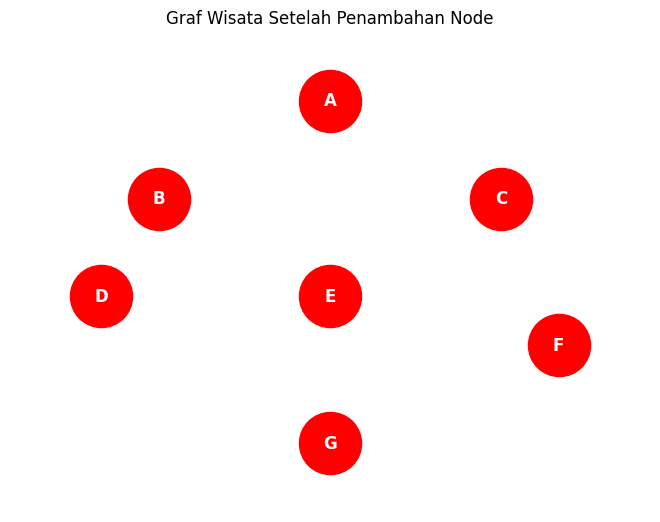

In [8]:
nodes = ["A", "B", "C", "D", "E", "F", "G"] 

# Tambahkan node dari list variabel `nodes` pada graf wisata
G.add_nodes_from(nodes)

# Tampilkan graf kota setelah penambahan node
show_graph(G, pos, title="Graf Wisata Setelah Penambahan Node")


Contoh *output*:

![Add Node Wisata](./asset/1_tambah_node_wisatas.png)

**c.** Pada graf wisata, setiap edge mewakili jalan yang menghubungkan antar tempat wisata. Tugas anda adalah menambahkan edge ke dalam graf untuk setiap hubungan lokasi antar tempat wisata. 

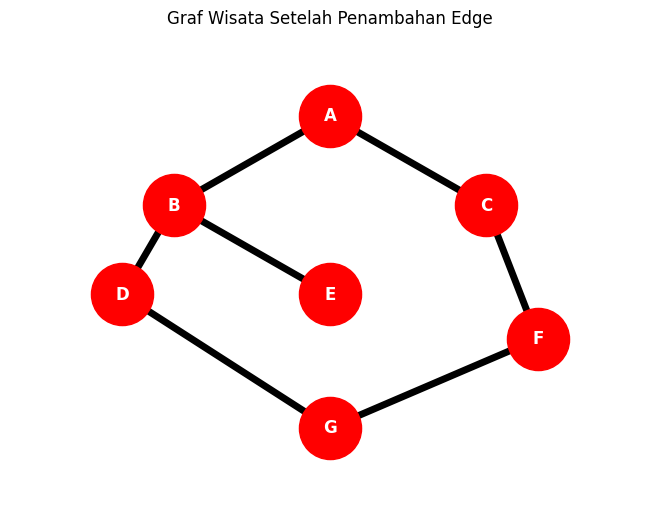

In [9]:
# Daftar hubungan edge yang menghubungkan jalan pada tempat wisata
edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("B", "E"),
    ("C", "F"),
    ("D", "G"),
    ("F", "G")
]

# Tambahkan edge ke dalam graf wisata
G.add_edges_from(edges)

# Graf wisata setelah penambahan edges
show_graph(G, pos, title="Graf Wisata Setelah Penambahan Edge")

Contoh *output*:

![Tambah Edge Wisata](./asset/2_tambah_edge_wisatas.png)

**d.** Gunakan algoritma **BFS** untuk menentukan rute dari **A** ke seluruh lokasi wisata. Tampilkan urutan kunjungan yang dihasilkan oleh **BFS**.

Tip: Gunakan `nx.bfs_edges()`.

In [10]:
print("Urutan tempat wisiata yang dikunjungi dengan algoritma BFS:")
i = 1  # Inisialisasi variabel untuk urutan kunjungan

# Loop melalui setiap edge yang dihasilkan dari BFS yang dimulai dari node A
for edge in nx.bfs_edges(G, source="A"):
    # Mencetak kunjungan dengan format asal - tujuan
    print(f"{i}. {edge[0]} - {edge[1]}")
    # Increment nomor urut
    i += 1

Urutan tempat wisiata yang dikunjungi dengan algoritma BFS:
1. A - B
2. A - C
3. B - D
4. B - E
5. C - F
6. D - G


Contoh *output*:

Urutan tempat wisiata yang dikunjungi dengan algoritma BFS:
1. A - B
2. A - C
3. B - D
4. B - E
5. C - F
6. D - G

### 2. Optimalisasi Rute Pengiriman Barang dengan Biaya Terendah

Rina adalah seorang manajer logistik di sebuah perusahaan ekspedisi yang beroperasi di sebuah kota besar. Kota tersebut memiliki beberapa titik pengiriman utama yang terhubung oleh berbagai jalan. Setiap jalan memiliki biaya tertentu yang tergantu pada jarak dan kondisi jalan.

Rina ingin menemukan rute pengiriman barang dengan biaya terendah dari gedung pusat (Lokasi `A`) ke titik pengiriman (Lokasi `G`). Rina perlu menggunakan metode yang mempertimbangkan biaya total perjalanan tanpa memperhatikan jumlah jalan yang dilalui.

kota tersebut terdiri dari 7 titik pengiriman (A, B, C, D, E, F, G) dengan biaya perjalanan antar titik sebagai berikut:
- A ke B: biaya 4
- A ke C: biaya 3
- B ke D: biaya 5
- B ke E: biaya 7
- C ke F: biaya 2
- D ke G: biaya 6
- E ke G: biaya 9
- F ke G: biaya 3

Bantu Rina mengimplementasikan algoritma ***Uniform Cost Search (UCS)*** untuk menemukan rute dengan biaya terendah dari titik `A` ke titik `G` dengan melakukan langkah berikut:

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [11]:
# Data posisi untuk masing-masing node agar lebih rapi saat ditampilkan
pos = {
    "A": (0, 4),
    "B": (-3, 2),
    "C": (3, 2),
    "D": (-4, 0),
    "E": (0, 0),
    "F": (4, -1),
    "G": (0, -3)
}

In [12]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=2000,     # Ukuran node
      font_color="white", # Warna font label node
      font_weight="bold", # Ketebalan font label node
      width=3             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_size=12,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()  

**a.** Inisialisasi graf bernama `titik_pengiriman` menggunakan **graf tidak berarah**.

In [13]:
# Inisialisasi graf tidak berarah
titik_pengiriman = nx.Graph()

**b.** Tambahkan node untuk merepresentasikan setiap titik pengiriman.

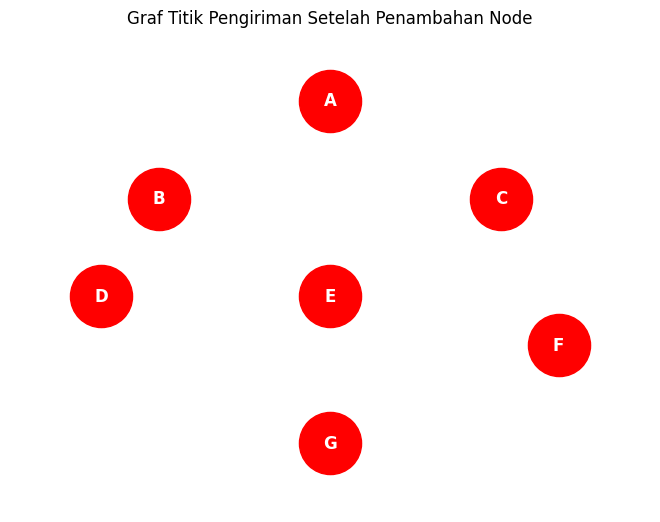

In [14]:
# List daftar nama titik pengiriman
nodes = ["A", "B", "C", "D", "E", "F", "G"]

# Tambahkan node dari list variabel `nodes` pada graf titik_pengiriman
titik_pengiriman.add_nodes_from(nodes)

# Tampilkan graf kota setelah penambahan node
show_graph(titik_pengiriman, pos, title="Graf Titik Pengiriman Setelah Penambahan Node")

Contoh *output*:

![Tambah node pengiriman](./asset/3_tambah_node_pengirimans.png)

**c.** Pada graf titik_pengiriman, edge mewakili biaya pengiriman dari satu titik ke titik lainnya. Tugas anda adalah menambahkan edge dari setiap titik pengiriman yang sudah ditentukan untuk melihat biaya pengiriman dari satu titik ke titik lain.

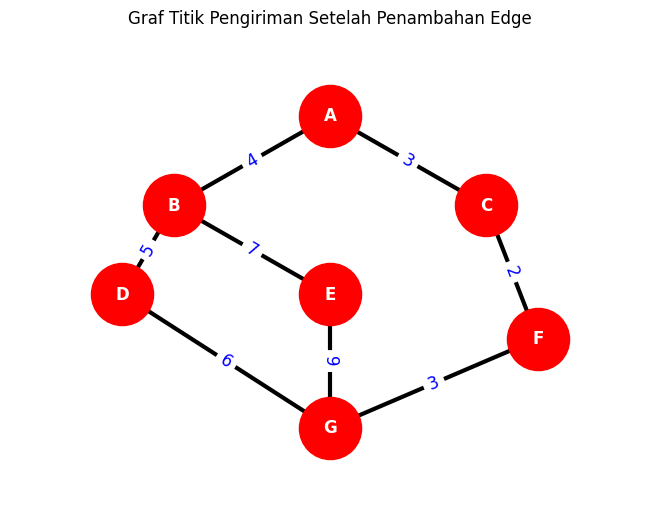

In [15]:
# Daftar biaya pengiriman antara dua titik
edges_with_weights = [
    ("A", "B", 4),
    ("A", "C", 3),
    ("B", "D", 5),
    ("B", "E", 7),
    ("C", "F", 2),
    ("D", "G", 6),
    ("E", "G", 9),
    ("F", "G", 3)
]

# Tambahkan biaya pengiriman ke dalam graf titik_pengiriman
titik_pengiriman.add_weighted_edges_from(edges_with_weights)

# Tampilkan graf titik_pengiriman setelah penambahan edge
show_graph(titik_pengiriman, pos, title="Graf Titik Pengiriman Setelah Penambahan Edge")

Contoh *output*:

![Tambah Edge Pengiriman](./asset/4_tambah_edge_pengirimans.png)

**d.** Pada potongan kode dibawah, buat fungsi `heuristable(a, b)`. Karena UCS tidak memperhatikan nilai heuristik, maka cukup kembalikan 0.

In [16]:
def heuristable(a, b):
    return 0

**e.** Pada potongan kode dibawah, buat kode untuk menemukan rute terpendek dengan mempertimbangkan jarak total antara lokasi awal dan lokasi tujuan yang dimasukkan oleh pengguna.

Dalam proses pencarian rute, gunakan algoritma ***Uniform Cost Seaerch (UCS)*** yang diimplementasikan menggunakan `nx.astar_path()` pada NetworkX dengan nilai heuristik 0 yang sudah didefinisikan pada fungsi `heuristable()`.

Kemudian tampilkan rute dengan biaya terkecil antara titik `A` ke `G` serta tampilkan juga besar jarak yang ditempuh dari titik awal ke titik tujuan tersebut.

In [17]:
# Mencari titik yang dikunjungi dari A ke G
shortest_path = nx.astar_path(titik_pengiriman, source="A", target="G", heuristic=heuristable, weight="weight")

# Menghitung biaya dari titik awal ke titik tujuan
total_cost = sum(
    titik_pengiriman[u][v]["weight"] for u, v in zip(shortest_path[:-1], shortest_path[1:])
)

# Cetak hasil
print(f"Titik yang dikunjungi dari A ke G: {shortest_path}")
print(f"Besar biaya yang dikeluarkan adalah: {total_cost}")

Titik yang dikunjungi dari A ke G: ['A', 'C', 'F', 'G']
Besar biaya yang dikeluarkan adalah: 8


Contoh *output*:

Titik yang dikunjungi dari A ke G: ['A', 'C', 'F', 'G']

Besar biaya yang dikeluarkan adalah: 8